In [508]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [509]:
# declare sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [510]:
# declare gradient function
def gradient(theta, X, y):
    m, n = X.shape
    _lambda = 
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    grad = (((X.T).dot(h-y))/m) 
    grad[1:] = grad[1:] + (_lambda/m) * theta[1:]
    return grad.flatten()

SyntaxError: invalid syntax (<ipython-input-510-3f259631e66e>, line 4)

In [511]:
# declare our cost function
def cost_function(theta, X, y):
    m, n = X.shape
    _lambda = 50
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    term1 = np.log(sigmoid(X.dot(theta))).reshape((m, 1))
    term2 = np.log(1 - sigmoid(X.dot(theta))).reshape((m, 1))
    term = y * term1 + (1 - y) * term2
    return -(np.sum((term))/m) + (_lambda/2*m)*np.sum((theta**2)[1:])

In [512]:
# turn our two features into a higher order function
def map_feature(x1, x2, degree=6):
    out = np.ones(x1.shape)
    for i in range(1, degree+1):
        for j in range(0, i+1):
            val = (x1**(i-j))*(x2**j)
            out = np.c_[out, val]
    return out

In [513]:
# fname = os.path.join(".", "winequality-red.csv")
fname = os.path.join(".", "ex2data2.txt")
# data = np.loadtxt(fname, skiprows=1, delimiter=";")
data = np.loadtxt(fname, delimiter=",")
M,N = np.shape(data)
# plotting alcohol and acidity and seeing if theres a correlation in quality
# X = np.c_[data[:,3], data[:,-2]]
X = np.c_[data[:,0], data[:,1]]
X = map_feature(X[:,0], X[:,-1])
print(X.shape)
# y = np.array(np.where(data[:,-1]<7, 1, 0))
y = np.array(data[:,-1])
print(len(y))
# multiclass
# classes = []
# for i in range(int(np.min(y)), int(np.max(y))):
#     yi = np.where(y==i, 1, 0)
#     classes.append(yi)

(1599, 28)
1599


In [514]:
m , n = X.shape
initial_theta = np.zeros(n)
Result = op.minimize(fun = cost_function, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = gradient)
optimal_theta = Result.x

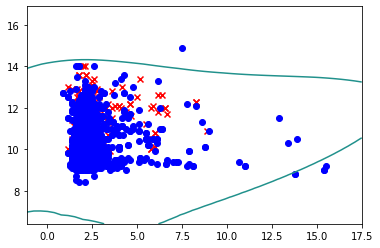

In [515]:
# plot X data
x1 = X[:,1]
x2 = X[:,2]
x1x = x1[np.where(y==1)]
x2x = x2[np.where(y==1)]
x1o = x1[np.where(y==0)]
x2o = x2[np.where(y==0)]

u = np.linspace(np.min(x1)-2, np.max(x1)+2)
v = np.linspace(np.min(x2)-2, np.max(x2)+2)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = map_feature(u[i], u[j]) @ optimal_theta
z = np.transpose(z)

plt.scatter(x1o, x2o, marker='x', c='r')
plt.scatter(x1x, x2x, marker='o', c='b')
plt.contour(u, v, z, levels=0)